In [2]:
#ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to 
#develop a model which help them in understanding whether a particular customer will buy their product or not 
#(based on customer's past interaction with bank or other Financial Institution). Bank wants to use ML model to 
#shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, 
#SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

import pandas as pd
import numpy as np
import statistics
import sklearn
import warnings
#import missingno as msno
#warnings.filterwarnings('ignore')

from datetime import datetime, timedelta
from math import sqrt


from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report


%matplotlib inline
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 
#import scipy.stats as scs
#import scipy.stats as stats

import statsmodels.api as sm
from datetime import date, datetime, time

#Input and Read Data
#Input
df_bankdata=pd.read_csv('bank-full.csv',delimiter=';')

In [3]:
df_bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Check to see if there are any null values 
df_bankdata.isnull().sum().sort_values(ascending=False)

age          0
day          0
poutcome     0
previous     0
pdays        0
campaign     0
duration     0
month        0
contact      0
job          0
loan         0
housing      0
balance      0
default      0
education    0
marital      0
y            0
dtype: int64

In [6]:
data_dup =df_bankdata[df_bankdata.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


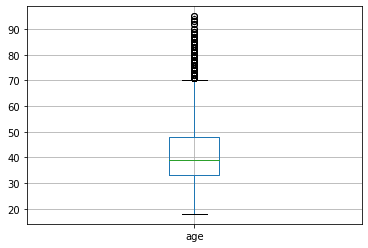

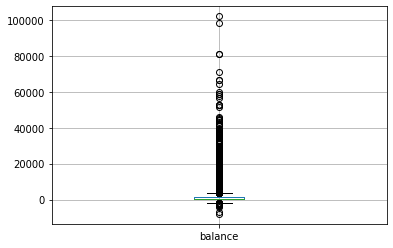

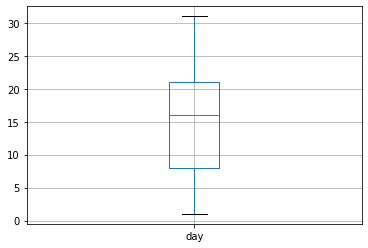

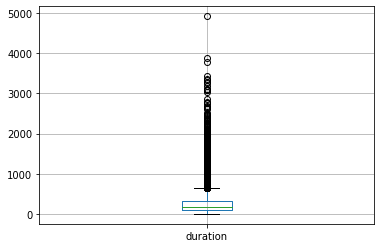

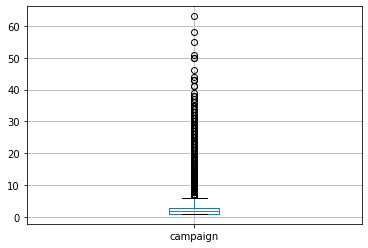

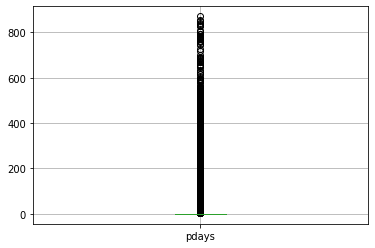

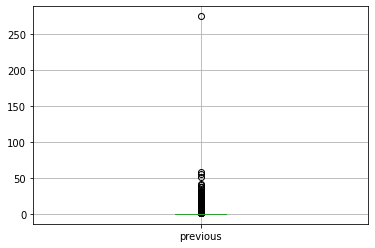

In [8]:
Numerical_column = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']
for i in (Numerical_column):
    df_bankdata.boxplot(column=[i])
    plt.show()

In [9]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age


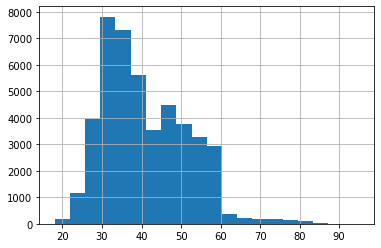

balance


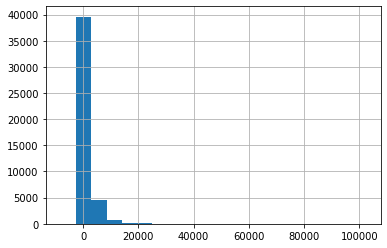

day


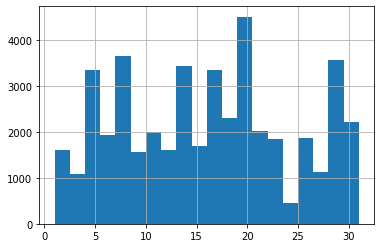

duration


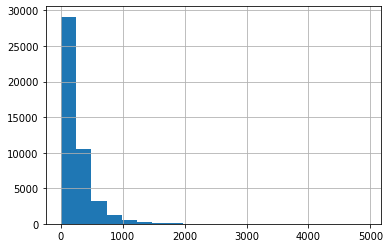

campaign


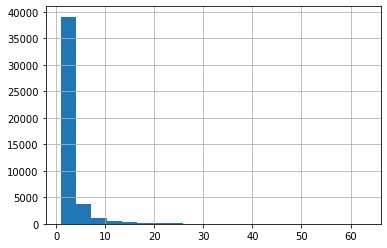

pdays


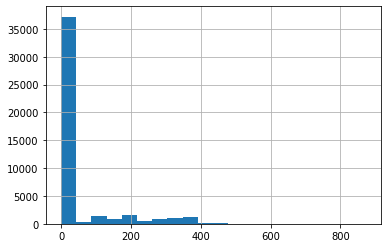

previous


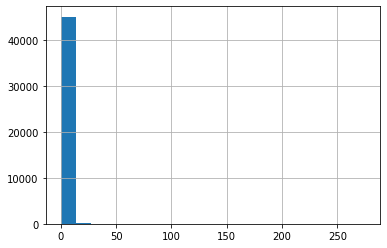

In [10]:
#To better observe data I can graph it and visually understand.
#I graph histograms of the data to gather insights

for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [11]:
for num in (Numerical_column):
    #print("Log"+num)
    df_bankdata["Log"+num] = df_bankdata[num].map(lambda i: np.log(i) if i > 0 else 0) 
    print(num, df_bankdata[num].skew())
    print("Log"+num, df_bankdata["Log"+num].skew())

age 0.6848179257252598
Logage 0.0989014480878478
balance 8.360308326166326
Logbalance -0.8614392203590333
day 0.09307901402122411
Logday -1.073595605645062
duration 3.144318099423456
Logduration -0.5066496877758495
campaign 4.898650166179675
Logcampaign 0.8802108957712975
pdays 2.6157154736563477
Logpdays 1.7129722110271126
previous 41.84645447266292
Logprevious 3.4205071766451938


In [12]:
df_bankdata.describe()

,age,balance,day,duration,campaign,pdays,previous,Logage,Logbalance,Logday,Logduration,Logcampaign,Logpdays,Logprevious
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,3.679433,5.305018,2.561803,5.162219,0.706819,0.954961,0.149664
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.254577,2.798657,0.713012,0.933751,0.712172,2.045435,0.451112
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.890372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.496508,4.276666,2.079442,4.634729,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.663562,6.104793,2.772589,5.192957,0.693147,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,3.871201,7.264030,3.044522,5.765191,1.098612,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,4.553877,11.533972,3.433987,8.500657,4.143135,6.769642,5.616771


age


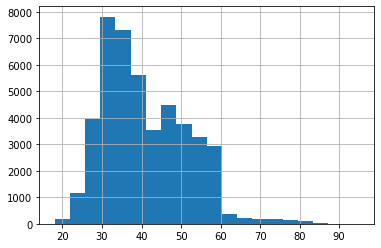

balance


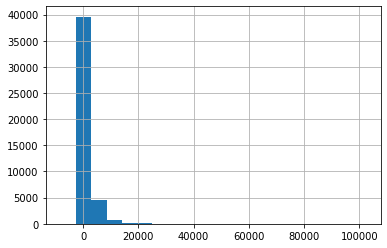

day


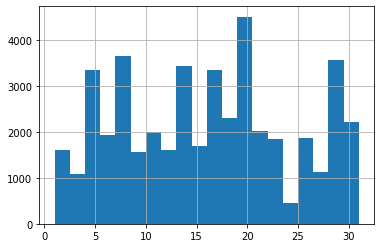

duration


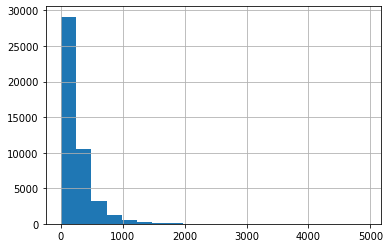

campaign


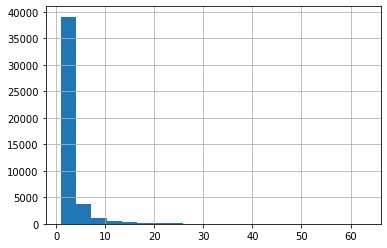

pdays


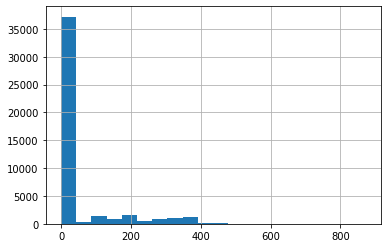

previous


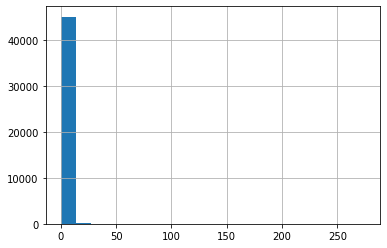

In [13]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [14]:
for num in (Numerical_column):
    print(num + ' median', df_bankdata[num].quantile(0.50)) 
    print(num + ' outlier', df_bankdata[num].quantile(0.95)) 
    df_bankdata[num] = np.where(df_bankdata[num] >= df_bankdata[num].quantile(0.95), df_bankdata[num].quantile(0.50) , df_bankdata[num])
    df_bankdata.describe()
    


age median 39.0
age outlier 59.0
balance median 448.0
balance outlier 5768.0
day median 16.0
day outlier 29.0
duration median 180.0
duration outlier 751.0
campaign median 2.0
campaign outlier 8.0
pdays median -1.0
pdays outlier 317.0
previous median 0.0
previous outlier 3.0


age


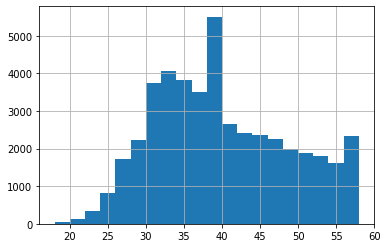

balance


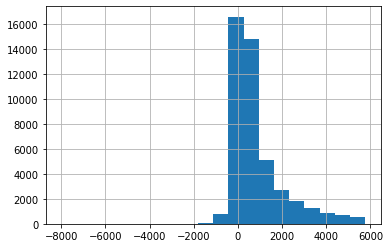

day


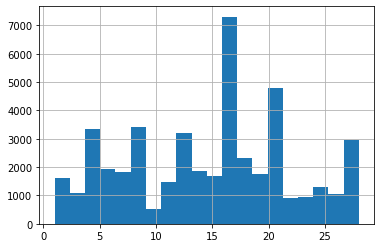

duration


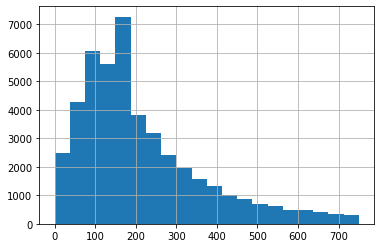

campaign


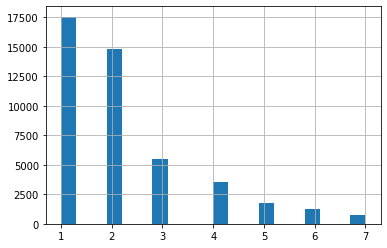

pdays


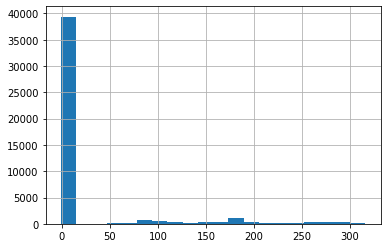

previous


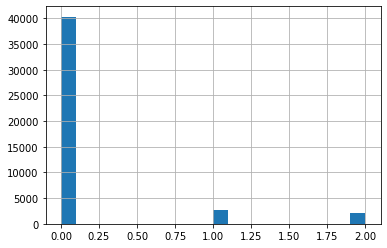

In [15]:
for num in (Numerical_column):
    print(num)
    hist = df_bankdata[num].hist(bins=20)
    plt.show()

In [16]:
print(df_bankdata["job"].value_counts())
print("*"*30)
print(df_bankdata["marital"].value_counts())
print("*"*30)
print(df_bankdata["education"].value_counts())
print("*"*30)
print(df_bankdata["y"].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
******************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
******************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
******************************
no     39922
yes     5289
Name: y, dtype: int64


In [17]:
#The above data is imbalanced with the number of nos being over 88 percent more likely than yes.

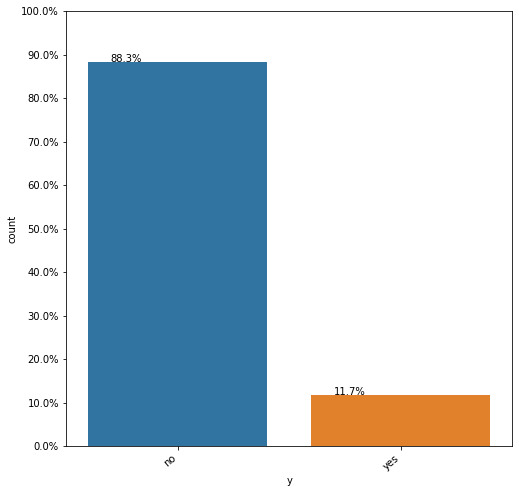

In [18]:
# We will now continue with the Exploritory Data Analysis.
# To see the distribution of the imbalance we do the following:
plt.figure(figsize=(8,8))
Y = df_bankdata["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df_bankdata)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#use 10 steps from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

In [19]:
#Next we will find the distribution for each of the counts that we completed above.
def countplot(label, df_bankdata):
  plt.figure(figsize=(10,8))
  Y = df_bankdata[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bankdata)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.title(label +" "+ " count")
  plt.show()

%matplotlib inline

def countplot_withY(label, df_bankdata):
  plt.figure(figsize=(10,8))
  Y = df_bankdata[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bankdata, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.title(label +""+ " count vs yes/no")
  plt.show()

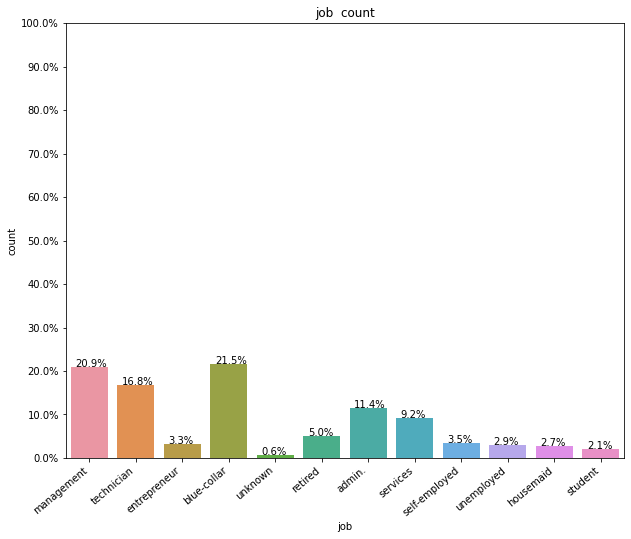

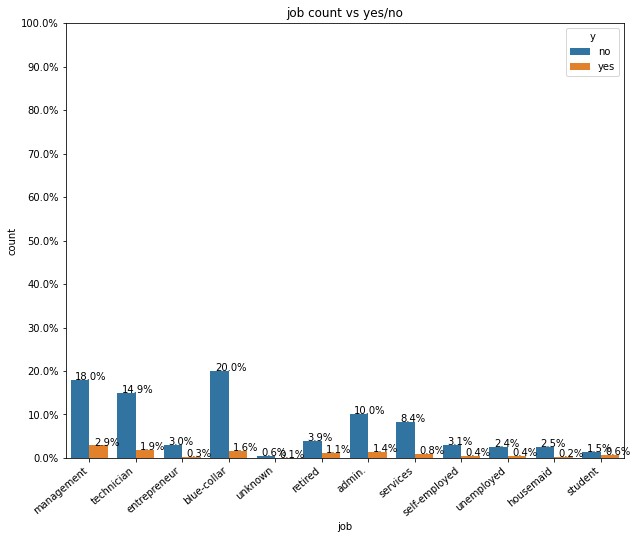

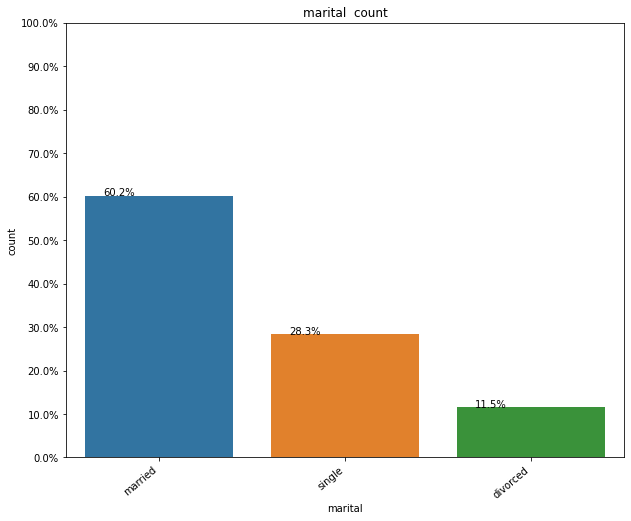

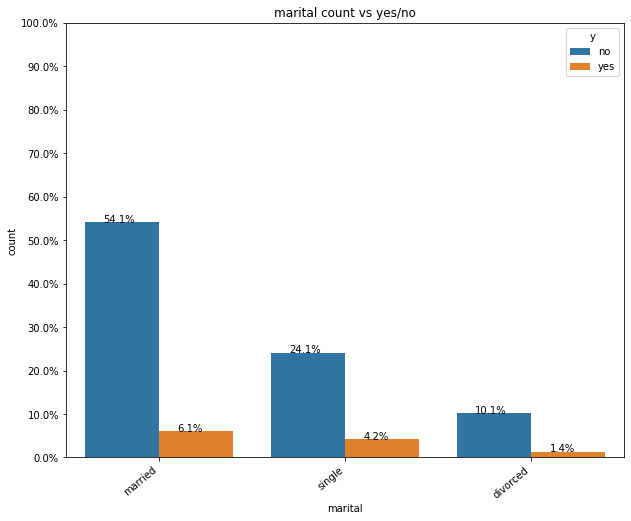

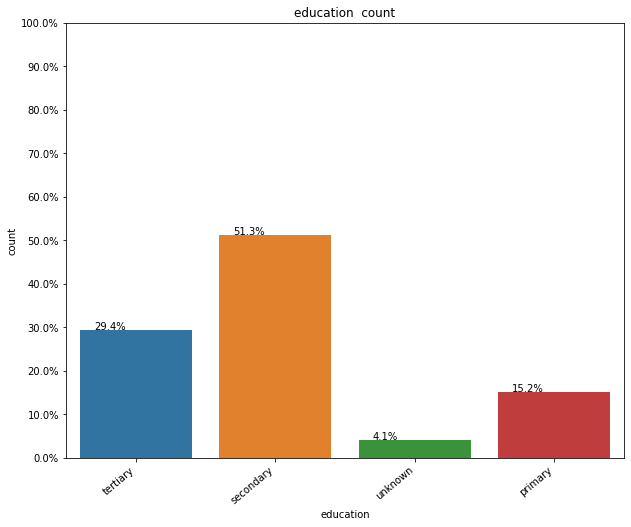

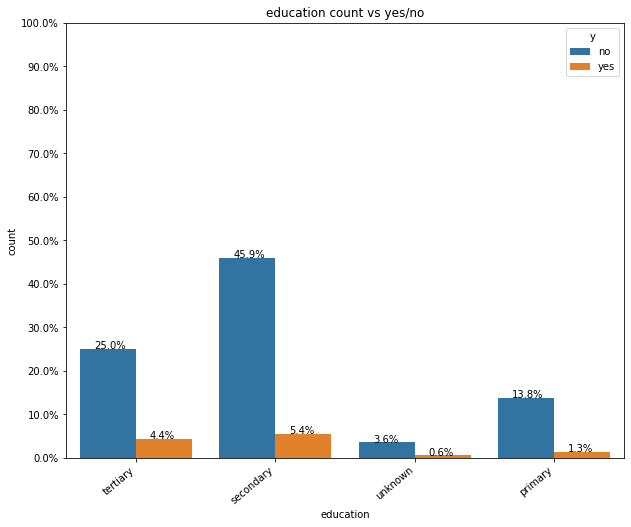

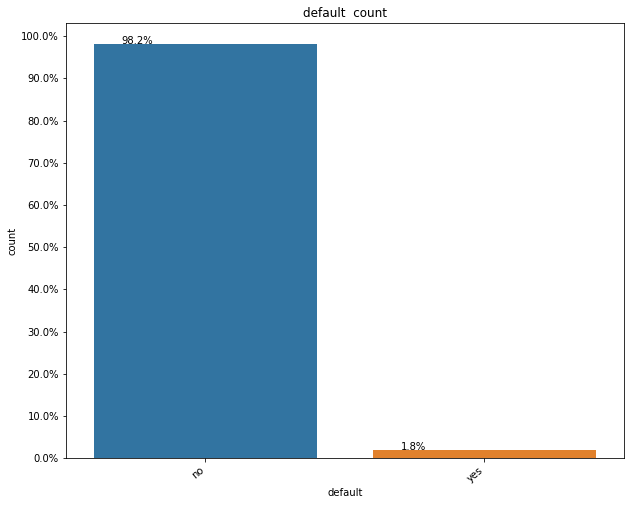

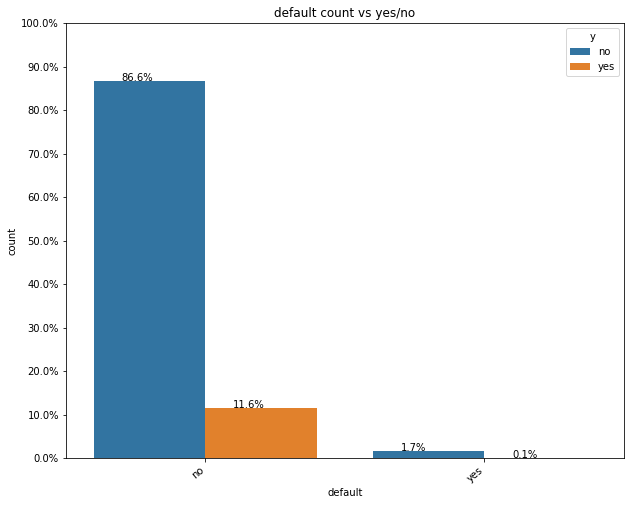

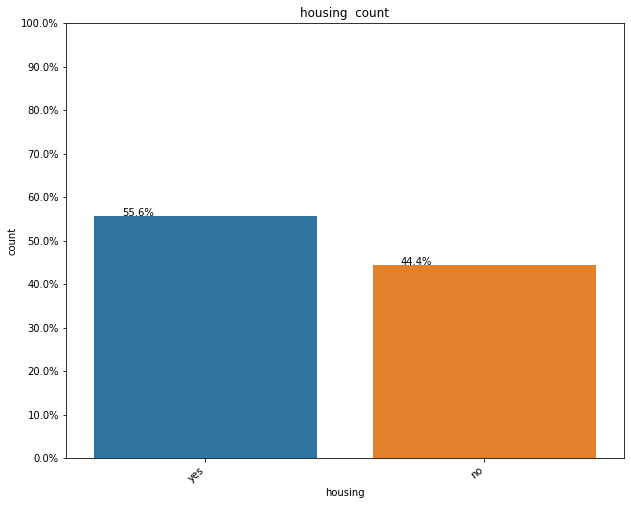

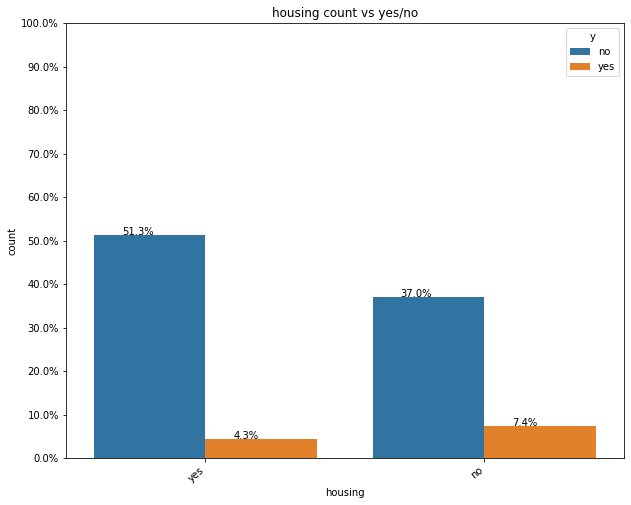

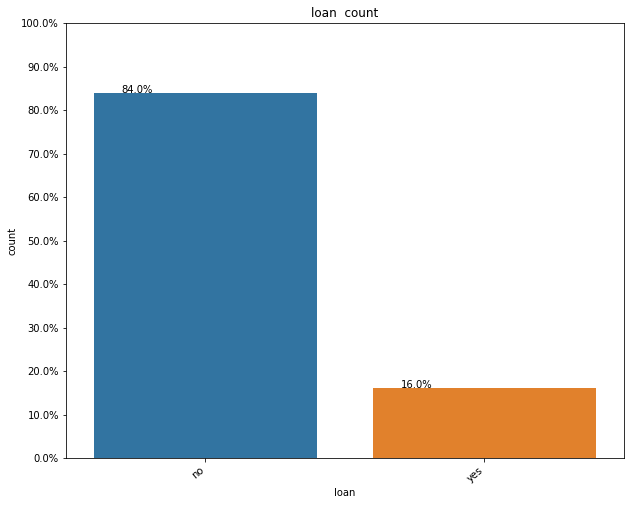

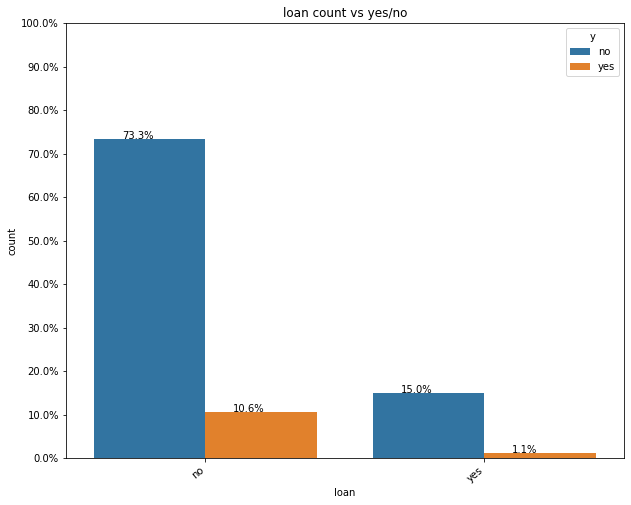

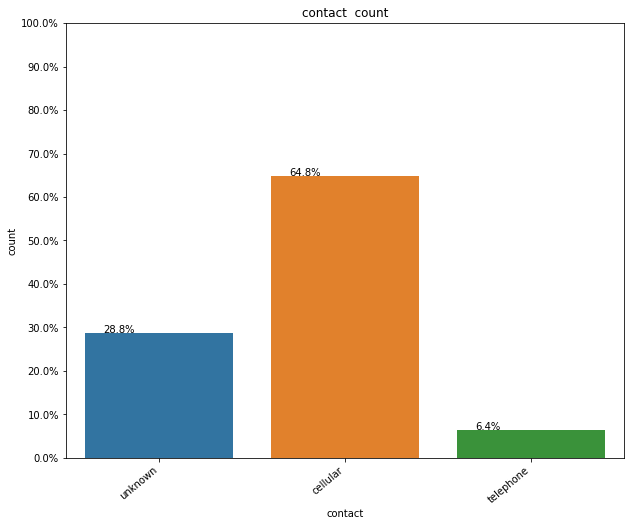

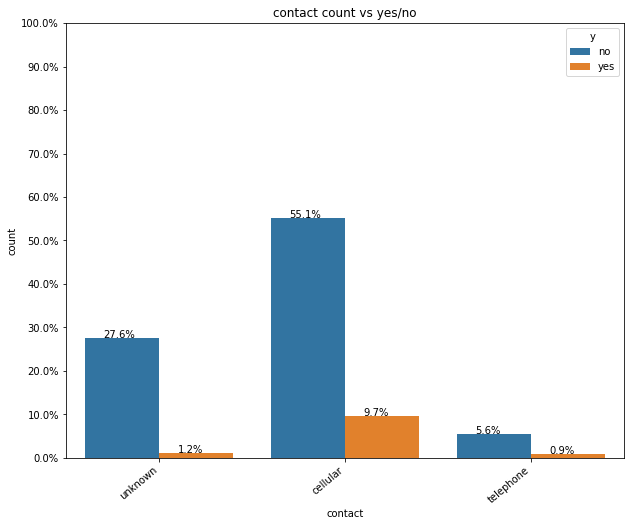

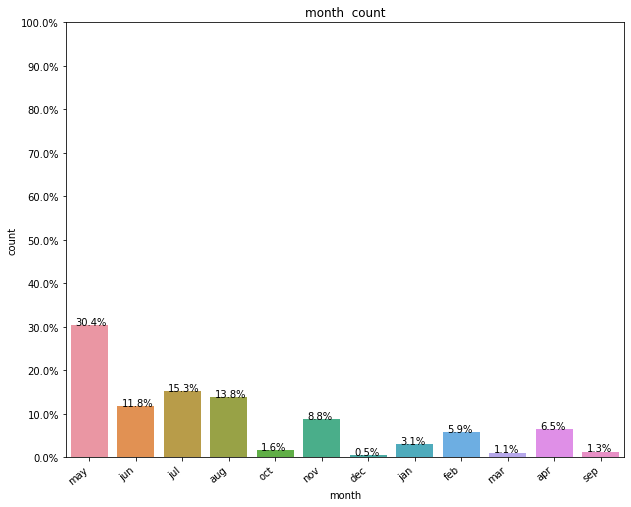

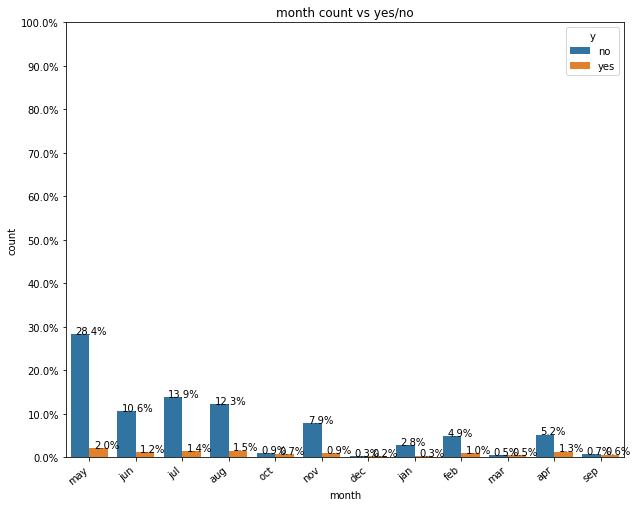

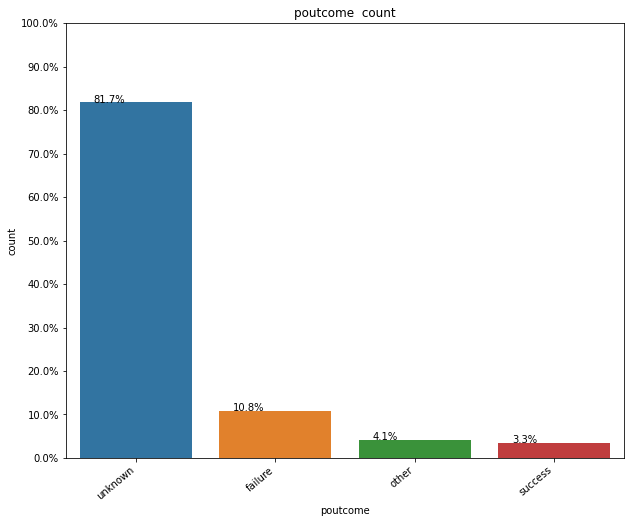

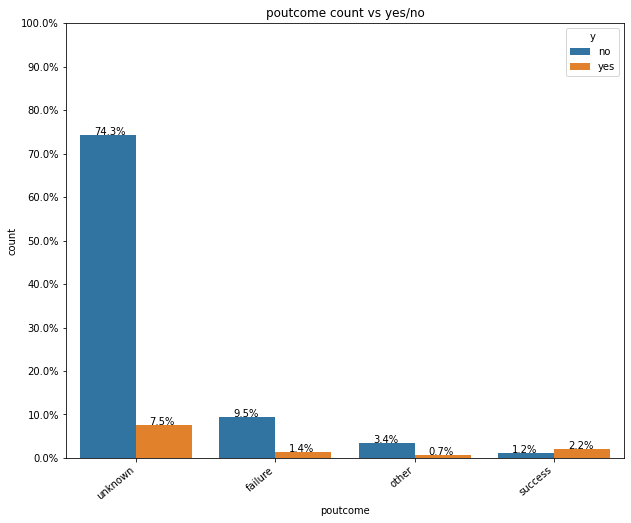

In [20]:
#Customers with a marital status of married have the highest rate of subscriptions and non prescriptions.  
#This is because most customers are married.

Categorical_column = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'poutcome']
for i in (Categorical_column):
    countplot(i, df_bankdata)
    countplot_withY(i, df_bankdata)


In [21]:
#Customers with the job blue-collar were more likely to subscribe
#Customers with the marital status "married" are more likely to subscribe and not to subscribe.  This is because most customers are married.
#Customers with a secondary education are more likely to suscribe and not subscribe. Most customers have a secondary education.
#Most customers do not have defaulted credit so they are more likely to subscribe as well as not subscribe.  But most of them subscribe.
#Those with a housing loan are more likely to subscribe.
#Most customers do not have a personal loan so they are more likely to subscribe if they do not have a personal loan.
#Most customers have cell phones.
#Most customers were contacted last in May.
#Most customers have aprevious outcome of unknown.

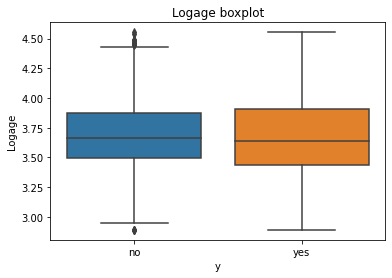

<Figure size 720x576 with 0 Axes>

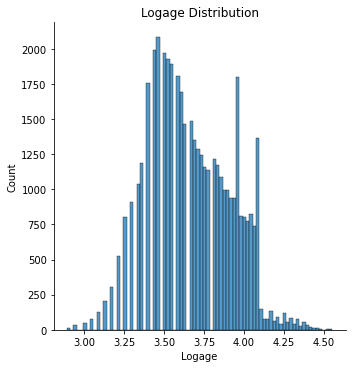

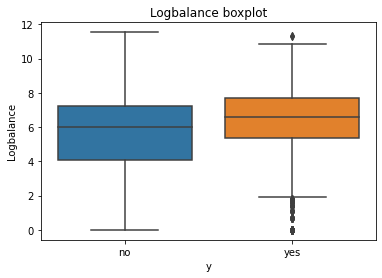

<Figure size 720x576 with 0 Axes>

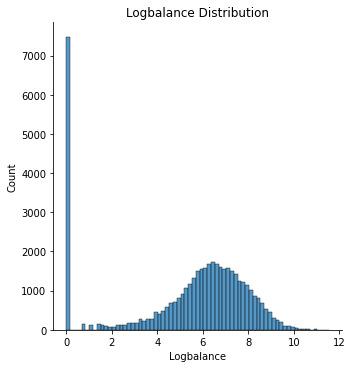

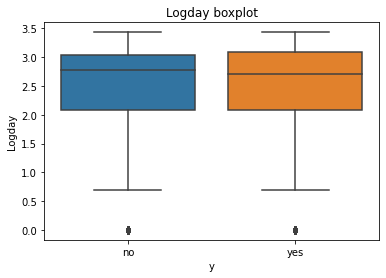

<Figure size 720x576 with 0 Axes>

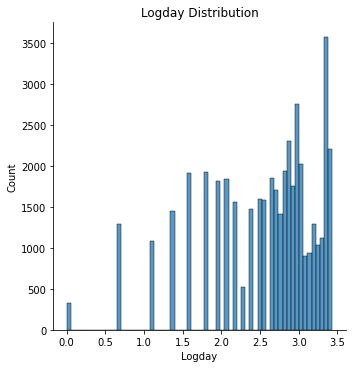

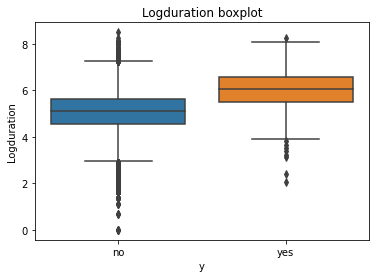

<Figure size 720x576 with 0 Axes>

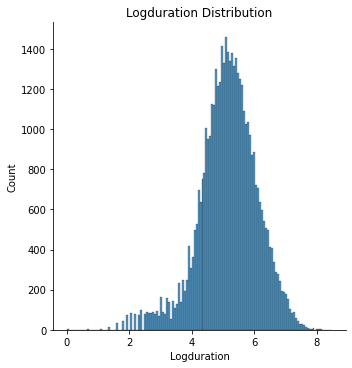

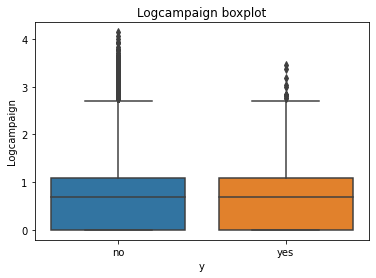

<Figure size 720x576 with 0 Axes>

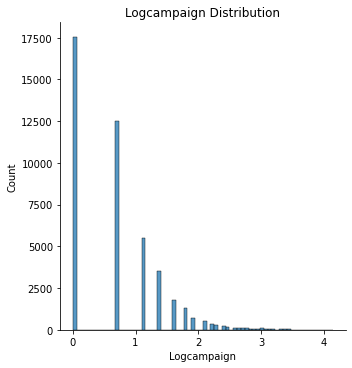

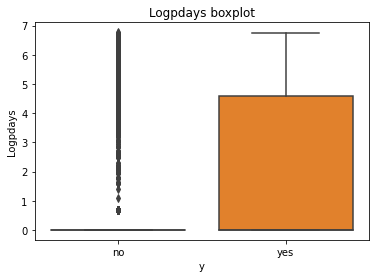

<Figure size 720x576 with 0 Axes>

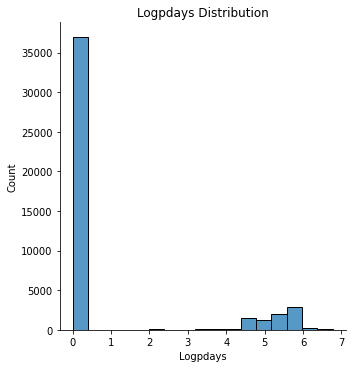

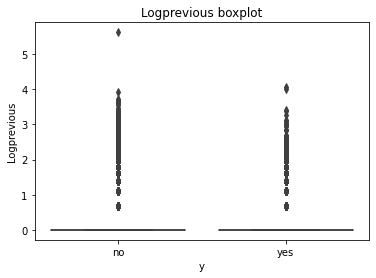

<Figure size 720x576 with 0 Axes>

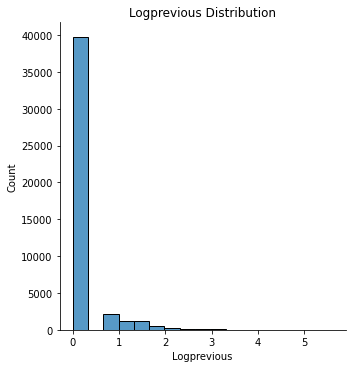

In [22]:
Log_numcol=['Logage', 'Logbalance', 'Logday', 'Logduration', 'Logcampaign', 'Logpdays','Logprevious']
#for num in (Numerical_column):
for num in (Log_numcol):
    hist = df_bankdata[num].hist(bins=30)
    %matplotlib inline
    sns.boxplot(data=df_bankdata, x="y", y=num)
    plt.title(num+" "+ "boxplot")
    plt.figure(figsize=(10,8))
    sns.displot(df_bankdata[num])
    plt.title(num+" "+ "Distribution")
    plt.show()

In [23]:
#From the boxplot we see the median age of the customer who did and did not subscribe is 37-39.
#With so much overlap age is not necessarily a good indicator of customers and their subscription choices.
# From the distribution we see that most of the customers are between 30-45.
#The median for balance is about the same for customers who subscribe as well as those who do not subscribe. 
#There is a lot of overlap so balance does not seem useful.
#The median for the day customers subsribe or do not subscribe is between 15-16.  
#The distribution shows the most customers are between days 5 and 20. With so much overlap
# the day does not seem useful.

#The duration, campaign and pdays has very little overlap so they will be useful in indicating subscription choices.

#The customers fall between 0-0.25 for previous.

Text(0.5, 1.05, 'Pearson correlation of Features')

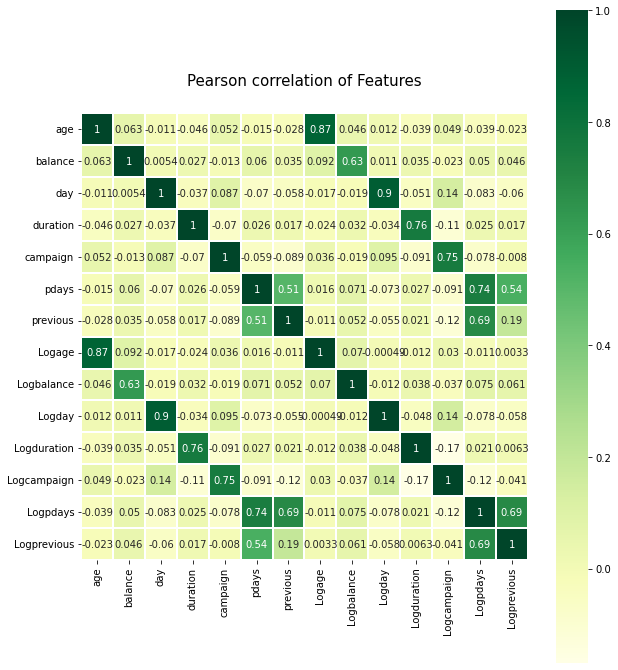

In [24]:
#Now we will explore the correlation matrix to get a better understanding of how all the variables
#are related

corr = df_bankdata.corr()
f, ax = plt.subplots(figsize=(10,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)
plt.title("Pearson correlation of Features", y=1.05, size=15)


In [25]:
#Previous and pdays have the highest correlation.  They have a postive correlation of .69.

#Now we want to separate independent and dependent variables:

data_x = df_bankdata.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = df_bankdata["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (45211, 23)
Shape of Y: (45211,)


In [26]:
#We can split the training data and test data
X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (28934, 23)
X CV: (7234, 23)
X Test: (9043, 23)
Y Train: (28934,)
Y CV: (7234,)
Y Test: (9043,)


In [27]:
# Replace "no" with 0 and "yes" with 1
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [28]:
#We encode using one hot encoding to all the categorical features so that we can apply models on the data.

# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [29]:

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names_out()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs iteratively and encode the 
    features using One hot Encoding mechanism and also adding the encoded feature
    to its respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)
    

In [30]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  poutcome
Encoding for feature:  y
Shape of train:  (28934, 59)
Shape of CV:  (7234, 59)
Shape of test:  (9043, 59)


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28934 entries, 34672 to 24696
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  28934 non-null  float64
 1   balance              28934 non-null  float64
 2   day                  28934 non-null  float64
 3   duration             28934 non-null  float64
 4   campaign             28934 non-null  float64
 5   pdays                28934 non-null  float64
 6   previous             28934 non-null  float64
 7   Logage               28934 non-null  float64
 8   Logbalance           28934 non-null  float64
 9   Logday               28934 non-null  float64
 10  Logduration          28934 non-null  float64
 11  Logcampaign          28934 non-null  float64
 12  Logpdays             28934 non-null  float64
 13  job_admin.           28934 non-null  int64  
 14  job_blue-collar      28934 non-null  int64  
 15  job_entrepreneur     28934 non-n

In [32]:
data_x.to_csv("data_x.csv")
data_y.to_csv("data_y.csv")

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


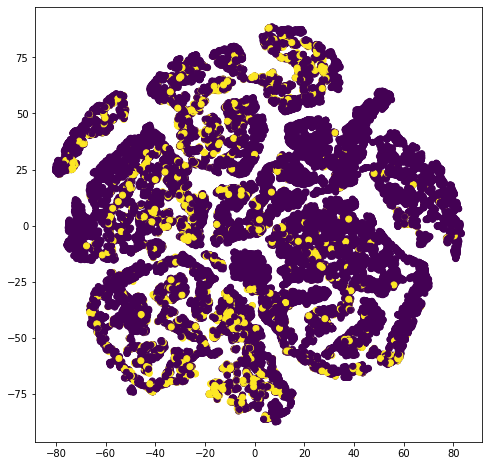

In [33]:
#We will create a simple LogisticRegression model with and without "duration"

#We will start with data visualization with "duration"

%matplotlib inline

# T-SNE plot for train dataset
pca = PCA()
tsne = TSNE(init=pca)
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


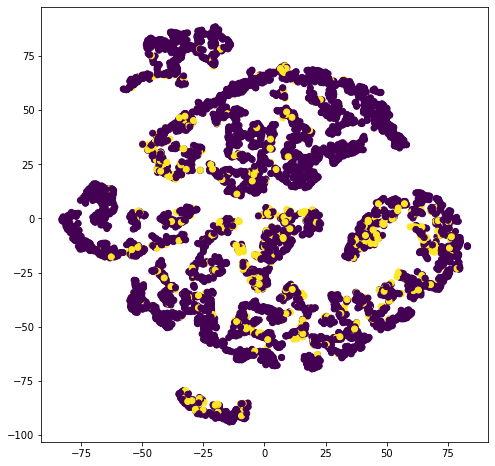

In [34]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


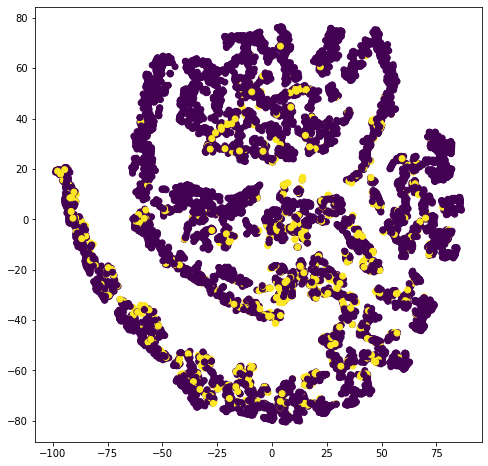

In [35]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

In [36]:
#The "duration" is highly correlated with the targeted feature so the final model will not include the duration feature
# with "duration" column
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test) 


1.0

In [37]:
# with duration column the AUC score is very good, 1.0
#Now we can remove the duration feature.
# From Train
X_train = X_train.drop("duration", axis=1)
print("The shape of the train dataset: ", X_train.shape)

# From CV
X_cv = X_cv.drop("duration", axis=1)
print("The shape of the cv dataset: ", X_cv.shape)

# From Test
X_test = X_test.drop("duration", axis=1)
print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (28934, 58)
The shape of the cv dataset:  (7234, 58)
The shape of the test dataset:  (9043, 58)


/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


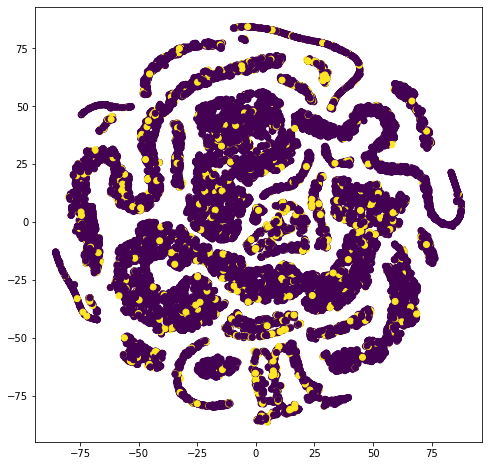

In [38]:
# Now we can visualize the data without duration using TSNE as we did before

%matplotlib inline

# T-SNE plot for train dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_train) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values)
plt.show()

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


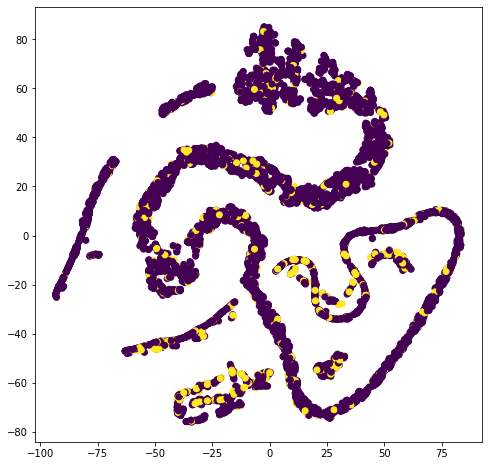

In [39]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


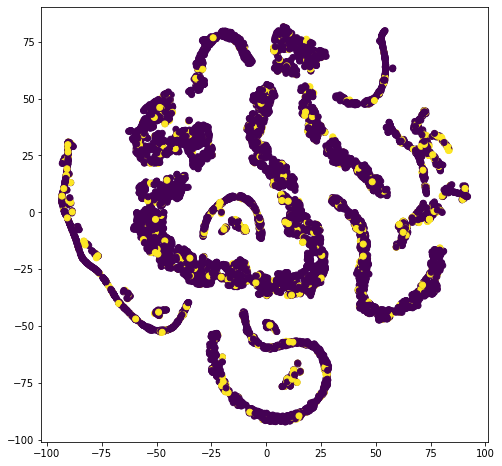

In [40]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test) 
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

In [41]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)

1.0

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

AUC for k =  1e-05 is 0.791782429371228
AUC for k =  0.0001 is 0.9718790365682718
AUC for k =  0.001 is 0.999960763066678
AUC for k =  0.01 is 0.9999990832492215
AUC for k =  0.1 is 0.9999983498485986
AUC for k =  1 is 1.0
AUC for k =  10 is 0.9998909066573525
AUC for k =  100 is 0.9999889989906574
AUC for k =  1000 is 0.9999697472243079


/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


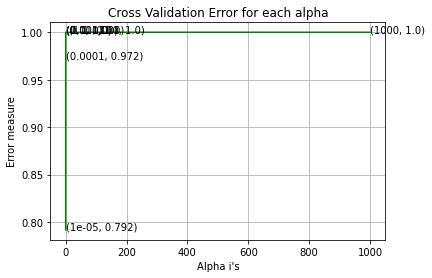

For values of best alpha =  1 The train AUC is: 1.0
For values of best alpha =  1 The cross validation AUC is: 1.0
For values of best alpha =  1 The test AUC is: 1.0


In [42]:
# We were able to check the model with the above ROC AUC score without duration and class balancing.

#Now we can use Logistic Regression on the model

from sklearn.calibration import CalibratedClassifierCV, _CalibratedClassifier


%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced'))
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe.score(X_test, y_test)
sig_clf = CalibratedClassifierCV(pipe, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.9763815663420451
AUC for alpha =  0.001 is 0.9670252078961579
AUC for alpha =  0.01 is 0.9876326652970409
AUC for alpha =  0.1 is 0.9047264919889733
AUC for alpha =  1 is 0.8357076261747015
AUC for alpha =  10 is 0.7374968486691987
AUC for alpha =  100 is 0.6780008232421991
AUC for alpha =  1000 is 0.6656153368738248


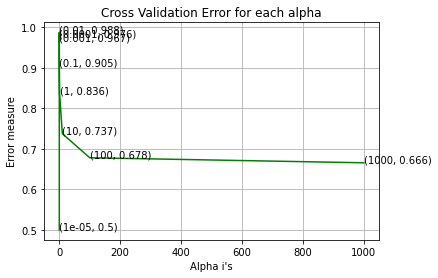

For values of best alpha =  0.01 The train AUC is: 0.9763558135102671
For values of best alpha =  0.01 The cross validation AUC is: 0.9772851159093845
For values of best alpha =  0.01 The test AUC is: 0.9774027766682715


In [43]:
# We choose Linear SVM for the Linear Model
from sklearn.linear_model import SGDClassifier
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

AUC for number of estimators =  10 is 1.0
AUC for number of estimators =  50 is 1.0
AUC for number of estimators =  100 is 0.9999999999999999
AUC for number of estimators =  500 is 1.0
AUC for number of estimators =  1000 is 1.0
AUC for number of estimators =  2000 is 1.0
AUC for number of estimators =  3000 is 1.0


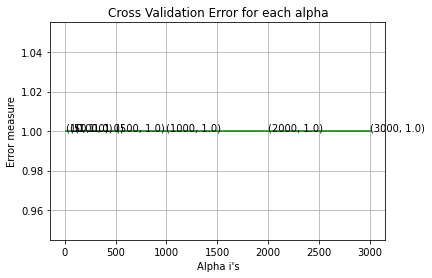

For values of best alpha =  10 The train AUC is: 1.0
For values of best alpha =  10 The cross validation AUC is: 1.0
For values of best alpha =  10 The test AUC is: 1.0


In [44]:
#For the ensemble model we use a Random Forest Model
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

alpha=[10,50,100,500,1000,2000,3000]
cv_auc_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

In [45]:
#Now I will apply the boost model using xgb boost.
import xgboost
from xgboost import XGBClassifier

%matplotlib inline

alpha=[10,50,100,500,1000,2000]
cv_auc_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC for number of estimators = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=x_cfl=XGBClassifier(n_estimators=i, tree_method="gpu_hist")
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

XGBoostError: [21:01:22] /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/gbm/../common/common.h:239: XGBoost version not compiled with GPU support.
Stack trace:
  [bt] (0) 1   libxgboost.dylib                    0x0000000143a39605 dmlc::LogMessageFatal::~LogMessageFatal() + 117
  [bt] (1) 2   libxgboost.dylib                    0x0000000143b1ecc0 xgboost::gbm::GBTree::ConfigureUpdaters() + 512
  [bt] (2) 3   libxgboost.dylib                    0x0000000143b1e857 xgboost::gbm::GBTree::Configure(std::__1::vector<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, std::__1::allocator<std::__1::pair<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > > > > const&) + 1143
  [bt] (3) 4   libxgboost.dylib                    0x0000000143b3e85c xgboost::LearnerConfiguration::Configure() + 1244
  [bt] (4) 5   libxgboost.dylib                    0x0000000143b3eb99 xgboost::LearnerImpl::UpdateOneIter(int, std::__1::shared_ptr<xgboost::DMatrix>) + 105
  [bt] (5) 6   libxgboost.dylib                    0x0000000143a3f8ff XGBoosterUpdateOneIter + 143
  [bt] (6) 7   libffi.dylib                        0x00007ff82631c882 ffi_call_unix64 + 82
  [bt] (7) 8   ???                                 0x00000003028a0920 0x0 + 12927502624



NotFittedError: need to call fit or load_model beforehand